In [1]:
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
spark = SparkSession.builder.appName('Question2').getOrCreate()
data = spark.read.csv('insurance.csv', header=True, inferSchema=True)

In [10]:
data.head

<bound method DataFrame.head of DataFrame[age: int, sex: string, bmi: double, children: int, smoker: string, region: string, charges: double]>

In [11]:
data.show(6)

+---+------+------+--------+------+---------+-----------+
|age|   sex|   bmi|children|smoker|   region|    charges|
+---+------+------+--------+------+---------+-----------+
| 19|female|  27.9|       0|   yes|southwest|  16884.924|
| 18|  male| 33.77|       1|    no|southeast|  1725.5523|
| 28|  male|  33.0|       3|    no|southeast|   4449.462|
| 33|  male|22.705|       0|    no|northwest|21984.47061|
| 32|  male| 28.88|       0|    no|northwest|  3866.8552|
| 31|female| 25.74|       0|    no|southeast|  3756.6216|
+---+------+------+--------+------+---------+-----------+
only showing top 6 rows



In [12]:
data.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- children: integer (nullable = true)
 |-- smoker: string (nullable = true)
 |-- region: string (nullable = true)
 |-- charges: double (nullable = true)



In [13]:
data.columns

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [14]:
len(data.columns)

7

In [17]:
data.describe().show()

+-------+------------------+------+------------------+-----------------+------+---------+------------------+
|summary|               age|   sex|               bmi|         children|smoker|   region|           charges|
+-------+------------------+------+------------------+-----------------+------+---------+------------------+
|  count|              1338|  1338|              1338|             1338|  1338|     1338|              1338|
|   mean| 39.20702541106129|  null|30.663396860986538|  1.0949177877429|  null|     null|13270.422265141257|
| stddev|14.049960379216147|  null| 6.098186911679012|1.205492739781914|  null|     null|12110.011236693992|
|    min|                18|female|             15.96|                0|    no|northeast|         1121.8739|
|    max|                64|  male|             53.13|                5|   yes|southwest|       63770.42801|
+-------+------------------+------+------------------+-----------------+------+---------+------------------+



+------+-----+
|smoker|count|
+------+-----+
|    no| 1064|
|   yes|  274|
+------+-----+



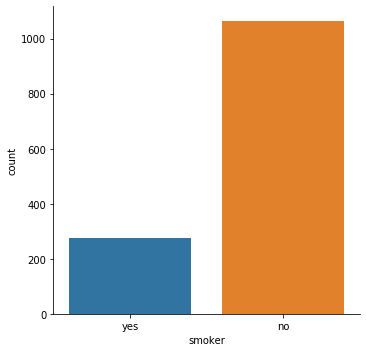

In [28]:
data.groupby('smoker').count().show()
zx = data.toPandas()
sns.catplot(x='smoker', kind='count', data=zx)

+--------+-----+
|children|count|
+--------+-----+
|       1|  324|
|       3|  157|
|       5|   18|
|       4|   25|
|       2|  240|
|       0|  574|
+--------+-----+



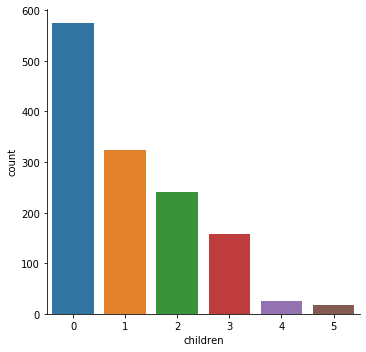

In [29]:
data.groupby('children').count().show()
sns.catplot(x='children', kind='count', data=zx)

Body Mass Index less than 25: 247
Body Mass Index greater than 25: 1091


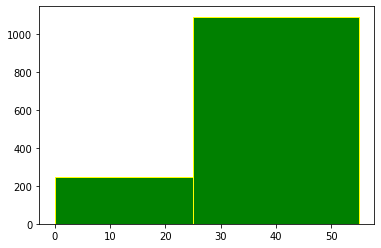

In [41]:
x=0
y=0
for j in zx['bmi']:
    if (j<=25):
        x+=1
    else:
        y+=1
print('Body Mass Index less than 25:', x)
print('Body Mass Index greater than 25:', y)
plt.hist(zx.bmi, bins=[0,25,55],facecolor='green', edgecolor='yellow')
plt.show()

Text(0.5, 1.0, 'Age Vs Charges')

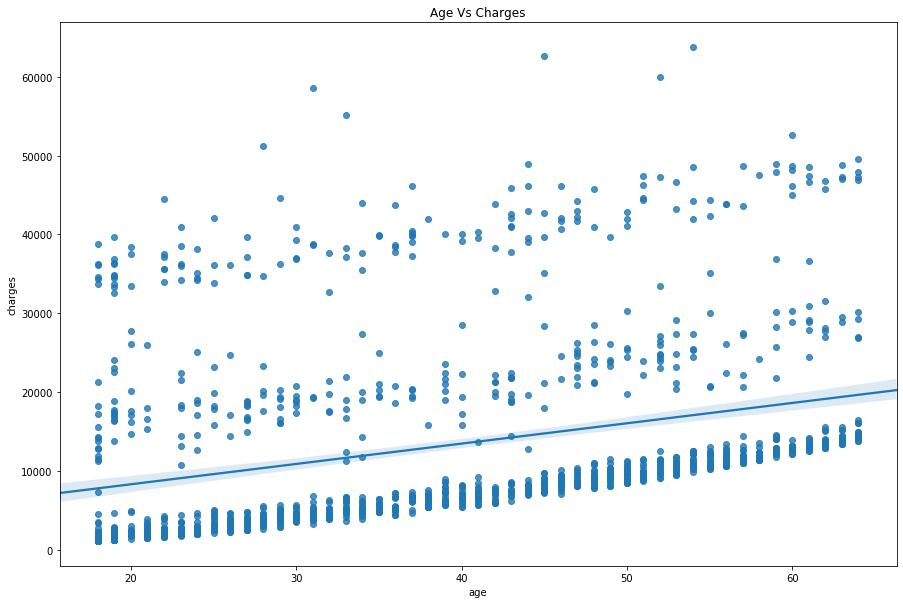

In [43]:
plt.figure(figsize=(15,10))
sns.regplot(x='age',y='charges', data=zx)
plt.title('Age Vs Charges')

Average price for three or less than three children: 11730.582377441857
Average price for more than three children: 13321.552083806173


Text(0.5, 1.0, 'No. of Children Vs Charges')

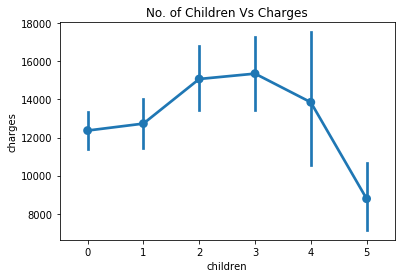

In [47]:
lth_mean,gth_mean = zx['charges'][zx['children'] > 3].mean(), zx['charges'][zx['children'] <= 3].mean()
print("Average price for three or less than three children:",lth_mean)
print("Average price for more than three children:",gth_mean)
sns.pointplot(x='children',y='charges', data=zx)
plt.title('No. of Children Vs Charges')

In [67]:
data.corr('age','charges')

0.299008193330648

In [68]:
data.groupBy("children").max().show()

+--------+--------+--------+-------------+------------+
|children|max(age)|max(bmi)|max(children)|max(charges)|
+--------+--------+--------+-------------+------------+
|       1|      64|   52.58|            1| 58571.07448|
|       3|      64|   46.53|            3| 60021.39897|
|       5|      52|   46.75|            5|    19023.26|
|       4|      61|   41.47|            4|   40182.246|
|       2|      64|   48.07|            2|  49577.6624|
|       0|      64|   53.13|            0| 63770.42801|
+--------+--------+--------+-------------+------------+



In [69]:
data.orderBy(data['charges'].desc()).show()

+---+------+------+--------+------+---------+-----------+
|age|   sex|   bmi|children|smoker|   region|    charges|
+---+------+------+--------+------+---------+-----------+
| 54|female| 47.41|       0|   yes|southeast|63770.42801|
| 45|  male| 30.36|       0|   yes|southeast|62592.87309|
| 52|  male|34.485|       3|   yes|northwest|60021.39897|
| 31|female|38.095|       1|   yes|northeast|58571.07448|
| 33|female| 35.53|       0|   yes|northwest|55135.40209|
| 60|  male|  32.8|       0|   yes|southwest|52590.82939|
| 28|  male|  36.4|       1|   yes|southwest|51194.55914|
| 64|  male| 36.96|       2|   yes|southeast| 49577.6624|
| 59|  male| 41.14|       1|   yes|southeast| 48970.2476|
| 44|female| 38.06|       0|   yes|southeast|48885.13561|
| 63|female|  37.7|       0|   yes|southwest|   48824.45|
| 57|  male| 42.13|       1|   yes|southeast| 48675.5177|
| 60|  male| 40.92|       0|   yes|southeast| 48673.5588|
| 54|  male|40.565|       3|   yes|northeast|48549.17835|
| 61|female|36

In [70]:
from pyspark.sql.functions import isnan, when, count, col
def get_null_value_count(data):
    data.select([count(when(isnan(c) | col(c).isNull(),c)).alias(c) for c in data.columns]).show()

In [71]:
get_null_value_count(data)

+---+---+---+--------+------+------+-------+
|age|sex|bmi|children|smoker|region|charges|
+---+---+---+--------+------+------+-------+
|  0|  0|  0|       0|     0|     0|      0|
+---+---+---+--------+------+------+-------+



In [50]:
cat_cols = [c[0] for c in data.dtypes if c[1]=='string']
cat_cols

['sex', 'smoker', 'region']

In [51]:
num_cols = [c[0] for c in df.dtypes if c[1]!='string']
num_cols = num_cols[0:3]
num_cols

['age', 'bmi', 'children']

In [54]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, StandardScaler
stages=[]
for cat_col in cat_cols:
    stringIndexer = StringIndexer(inputCol = cat_col, outputCol = cat_col + '_Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()],outputCols = [cat_col +'_OHE'])
    stages += [stringIndexer, encoder]
assemblerInputs = [c + '_OHE' for c in cat_cols] + num_cols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol='asv_features')
stages += [assembler]
ss = StandardScaler(inputCol='asv_features', outputCol='features')
stages += [ss]

In [57]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(data)
data_pipetrans = pipelineModel.transform(data)
data_trans = data_pipetrans.select('features','charges')

In [58]:
data_trans = data_trans.withColumnRenamed('charges','label')

In [59]:
train_data, test_data = data_trans.randomSplit([0.7,0.3], seed = 1234)

In [60]:
from pyspark.ml.regression import LinearRegression
zp = LinearRegression(featuresCol='features',labelCol='label')
zp_model = zp.fit(train_data)

In [62]:
trainSummary=zp_model.summary
print("MAE: ", trainSummary.meanAbsoluteError)
print("MSE: ", trainSummary.meanSquaredError)
print("RMSE: ", trainSummary.rootMeanSquaredError)
print("R2: ", trainSummary.r2)

MAE:  4156.93024116977
MSE:  35294045.11896927
RMSE:  5940.879153708588
R2:  0.7514985778969564


In [63]:
zp_predictions = zp_model.transform(test_data)
zp_predictions.select('features','prediction','label').show(5)

+--------------------+-------------------+----------+
|            features|         prediction|     label|
+--------------------+-------------------+----------+
|(8,[0,1,5,6],[1.9...|-2231.7923860140763| 1694.7964|
|(8,[0,1,5,6],[1.9...| -305.2379873113532| 1702.4553|
|(8,[0,1,5,6],[1.9...|  491.9569362897746| 1705.6245|
|(8,[0,1,5,6],[1.9...|  7204.609924282191|3268.84665|
|(8,[0,1,5,6],[1.9...|  8451.691516250417|12404.8791|
+--------------------+-------------------+----------+
only showing top 5 rows



In [65]:
from pyspark.ml.evaluation import RegressionEvaluator
lm_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='r2')
print("R Squared on test data: ", lm_evaluator.evaluate(zp_predictions))

R Squared on test data:  0.7470182227409288


In [66]:
# Displaying metrics of the model over test data
res = zp_model.evaluate(test_data)
print("MAE: ", res.meanAbsoluteError)
print("MSE: ", res.meanSquaredError)
print("RMSE: ", res.rootMeanSquaredError)
print("R2: ", res.r2)

MAE:  4294.353080248329
MSE:  39767469.09471185
RMSE:  6306.1453436082365
R2:  0.7470182227409288
